
<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;">
    <h1 style='margin:15px 15px; color:#4B0082; font-size:40px'>Centroid-based Clustering</h1>
    <h1 style='margin:15px 15px; color:#000; font-size:15px'>Réalisé par : AKHADAM Ayoub</h1>
    <h1 style='margin:15px 15px; color:#000; font-size:15px'>Master SDAD</h1>
   
</div>
    
    

    
    19/11/2021
    

## Chargement des packages nécessaires

In [59]:
library(ggplot2)
library(ggfortify)
library(factoextra)

## Jeu de données
Le dataset contient données des clients d'un streaming website sur leurs préférences en matière de films. Les clients ont évalué plusieurs films et ont attribué à chacun un genre unique, en donnant une note de 1 à 100.

L'ensemble de données contient les informations suivantes :

- Horror : la note moyenne donnée par le client pour les films d'horreur.

- Romcom : la note moyenne donnée par le client pour les comédies romantiques.

- Action : la note moyenne donnée par le client pour les films d'action

- Comedy : la note moyenne donnée par le client pour les comédies

- Fantasy : la note moyenne donnée par le client pour les films fantastiques.

Chaque ligne de l'ensemble de données représente un client et les notes moyennes qu'il a attribuées à 5 genres de films différents.

In [63]:
movies.data <- read.csv('movies.csv')
head(movies.data)

,Horror,Romcom,Action,Comedy,Fantasy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,72.5,29.9,68.6,40.7,57.9
2,82.2,45.3,76.5,17.4,67.7
3,70.0,44.0,65.1,53.7,37.8
4,99.1,21.0,77.9,25.4,40.3
5,84.0,0.0,68.1,49.8,40.0
6,70.2,55.0,97.2,48.1,40.5


In [64]:
summary(movies.data)

     Horror           Romcom          Action           Comedy      
 Min.   :  0.00   Min.   : 0.00   Min.   : 24.60   Min.   :  0.00  
 1st Qu.: 40.00   1st Qu.:19.90   1st Qu.: 58.75   1st Qu.: 38.50  
 Median : 62.80   Median :29.70   Median : 70.50   Median : 60.00  
 Mean   : 58.57   Mean   :31.25   Mean   : 68.84   Mean   : 56.52  
 3rd Qu.: 78.25   3rd Qu.:41.65   3rd Qu.: 80.55   3rd Qu.: 73.45  
 Max.   :100.00   Max.   :81.30   Max.   :100.00   Max.   :100.00  
    Fantasy      
 Min.   :  0.00  
 1st Qu.: 28.95  
 Median : 41.20  
 Mean   : 45.61  
 3rd Qu.: 59.85  
 Max.   :100.00  

### Nuage des points par couple de variables

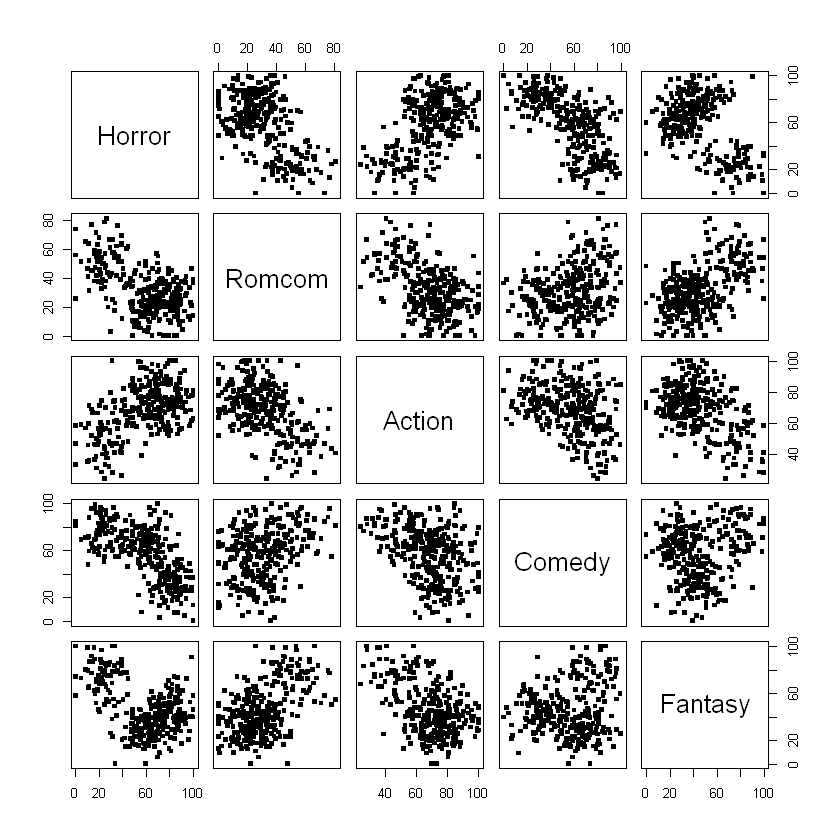

In [65]:
pairs(movies.data, pch=15, cex=0.8)

    D'aprés le graph on voit qu'il y a une corrélation positive entre horror et action et une corrélation négative entre 
    Comedy et horror.Donc Peut-on dire que les gens qui aiment les films d'horreur aiment aussi les films d'action et que 
    les personnes qui aiment les comédies n'aiment pas les films d'horreur?

### Application de Kmeans on choisissant aléatoirement k=3

In [66]:
set.seed(6)
(kmeans1 = kmeans(scale(movies.data), 3))

K-means clustering with 3 clusters of sizes 105, 72, 114

Cluster means:
       Horror     Romcom     Action     Comedy     Fantasy
1  0.90637289 -0.3683851  0.4315572 -1.1080902 -0.03648752
2 -1.39161333  1.2100503 -1.1767013  0.8158762  1.29578460
3  0.04409655 -0.4249402  0.3456929  0.5053192 -0.78478335

Clustering vector:
  [1] 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[260] 3 2 3 1 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 2

Within cluster sum of squares by cluster

> Nous avons 3 clusters qui contiennent 105, 72 et 114 points de données.

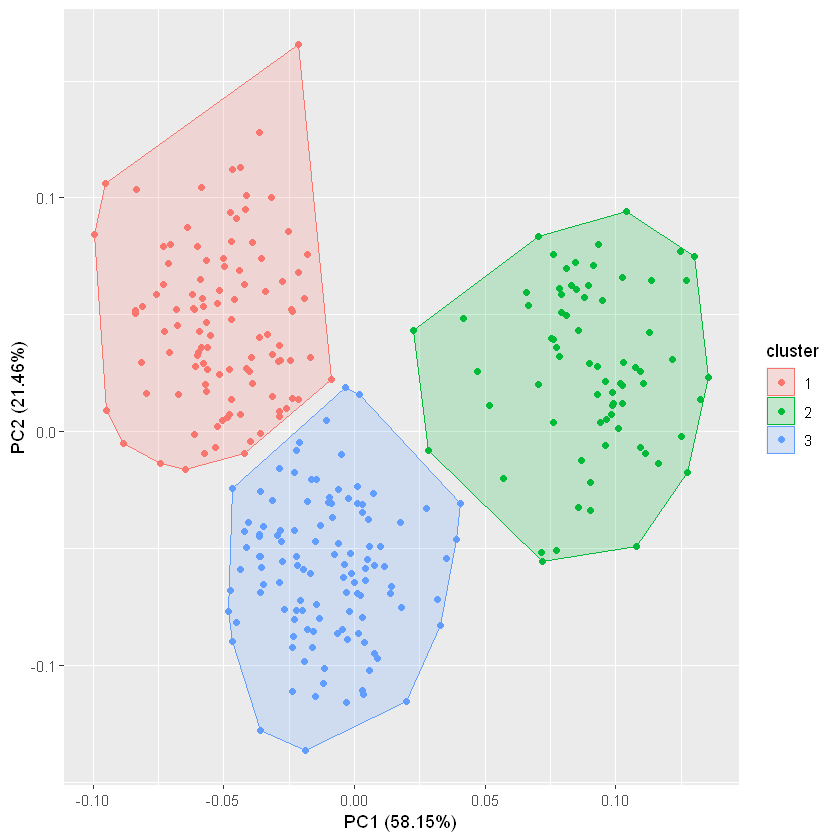

In [67]:
autoplot(kmeans1, movies.data, frame = TRUE)

### Interprétation des résulats

In [68]:
# moyennes des variables dans chaque cluster
print(colMeans(movies.data[kmeans1$cluster == 1, 1:5]))
print(colMeans(movies.data[kmeans1$cluster == 2, 1:5]))
print(colMeans(movies.data[kmeans1$cluster == 3, 1:5]))

  Horror   Romcom   Action   Comedy  Fantasy 
80.65810 24.98857 75.70952 31.43048 44.80667 
  Horror   Romcom   Action   Comedy  Fantasy 
24.65000 51.79583 50.11389 74.99306 74.11250 
  Horror   Romcom   Action   Comedy  Fantasy 
59.64211 24.02807 74.34298 67.96140 28.34649 


    Nous remarquons que le cluster 1 est composé des clients qui aiment les films d'horreur et d'action mais qui n'aiment 
    pas les comédies et les comédies romantiques. 

    Le cluster 2 semble être constitué de clients qui aiment les comédies et les films fantastiques mais n'aiment pas les 
    films d'horreur.

    Le cluster 3 semble être composé de clients qui aiment les films d'action et de comédie mais pas les comédies 
    romantiques et les films fantastiques. Ils semblent également apprécier les films d'horreur mais monis que les comédies 
    et les films d'action.


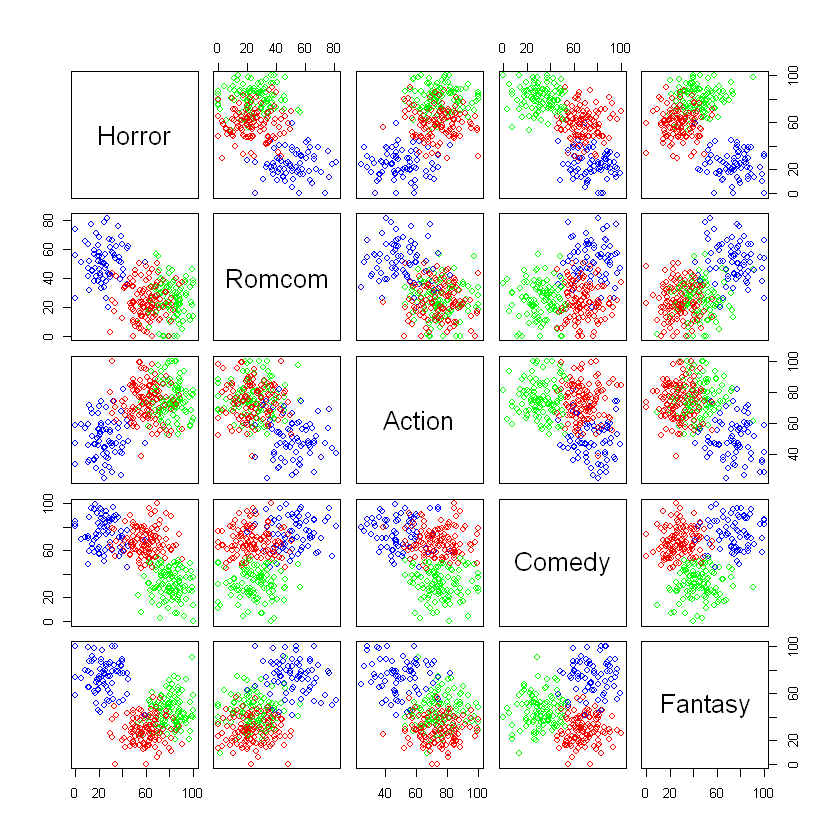

In [69]:
pairs(movies.data,col=c('green','blue','red')[kmeans1$cluster])

### Choix de nombre de cluster K avec Elbow Method

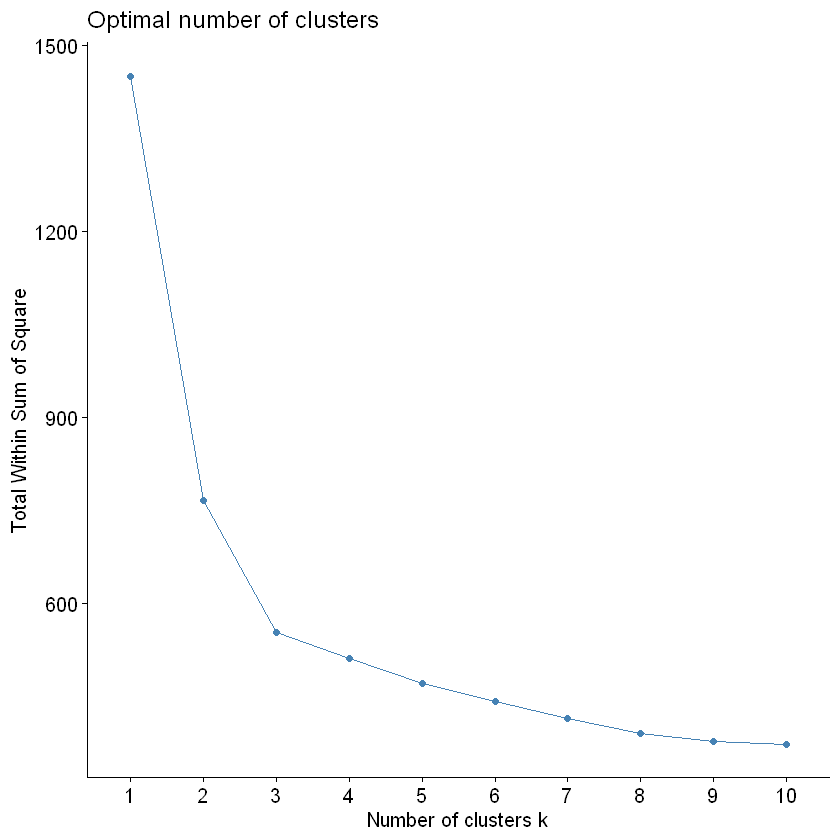

In [70]:
fviz_nbclust(scale(movies.data), kmeans, method = "wss") 

    D'aprés le grahique de la méthode elbow, on remarque que la courbe commence à diminuer plus lentement à K=3.
    Pour cela nous pouvons dire que K=3 est le nombre optimal de clusters pour cet ensemble de données.

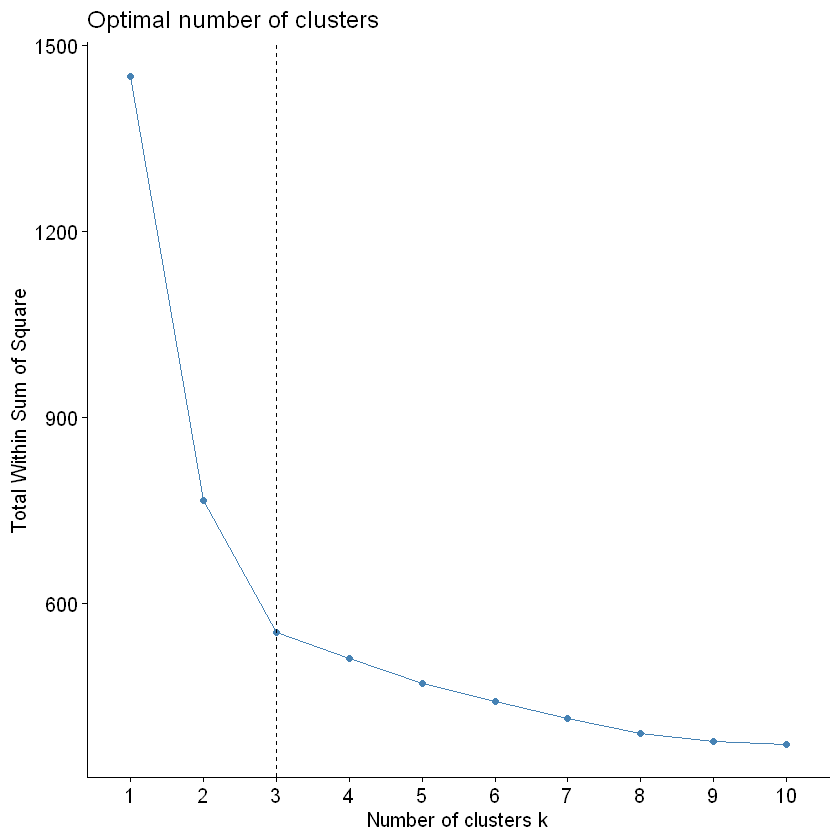

In [71]:
fviz_nbclust(scale(movies.data), kmeans, method = "wss") +
  geom_vline(xintercept =3, linetype = 2)